In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
import data_preprocessing
import importlib
importlib.reload(data_preprocessing)
import cross_validation
#import TEST
#importlib.reload(TEST)
importlib.reload(cross_validation)
import implemented_functions
importlib.reload(implemented_functions)



<module 'implemented_functions' from '/Users/mpecaut/ML_project1/project1/implemented_functions.py'>

In [3]:
#Load Data
x_train_raw, x_test_raw,y_train_raw, train_ids, test_ids = load_csv_data('dataset')

In [4]:
#Reformat y_train to have 0's instead of -1's
y_train_original = y_train_raw.copy()
y_train_raw[y_train_raw == -1] = 0

#replace NaN by a float to treat NaN as a categorical feature
#TODO: NAN'S :apagnan -10 or 0 --> SAME BETWEEN TRAIN AND TEST 
x_test_raw = np.nan_to_num(x_test_raw, nan = -10.0)
x_test_raw.shape
x_test_raw

array([[ 4.4000000e+01,  2.0000000e+00,  2.0820150e+06, ...,
         1.0000000e+00,  1.0000000e+00,  2.0000000e+00],
       [ 2.7000000e+01,  1.0000000e+00,  1.1920150e+06, ...,
        -1.0000000e+01, -1.0000000e+01,  2.0000000e+00],
       [ 3.5000000e+01,  5.0000000e+00,  5.2620150e+06, ...,
         1.0000000e+00,  1.0000000e+00,  2.0000000e+00],
       ...,
       [ 9.0000000e+00,  1.1000000e+01,  1.1272015e+07, ...,
         9.0000000e+00,  9.0000000e+00, -1.0000000e+01],
       [ 1.5000000e+01,  1.2000000e+01,  1.2122015e+07, ...,
         1.0000000e+00,  1.0000000e+00,  2.0000000e+00],
       [ 4.5000000e+01,  1.2000000e+01,  1.2282015e+07, ...,
        -1.0000000e+01, -1.0000000e+01,  2.0000000e+00]],
      shape=(109379, 321))

In [5]:
data_annoted = data_preprocessing.read_annotated_csv('dataset/data_anotated.csv')
x_train, y_train, x_test = data_preprocessing.preprocess_data2(x_train_raw[:,:], y_train_raw[:], x_test_raw[:,:], data_annoted)

/Users/mpecaut/ML_project1/project1/data_preprocessing.py:203: RuntimeWarning: invalid value encountered in divide
  data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))


In [6]:
data_annotated_important_feat = data_preprocessing.read_annotated_csv('dataset/data_anotated_revised.csv', important_feat_only=True)
x_train_imp_feat,y_train, x_test_imp_feat = data_preprocessing.preprocess_data2(x_train_raw,y_train_raw,x_test_raw,data_annotated_important_feat, important_feat_only=True)

In [7]:
np.savetxt('x_train_preprocessed.csv', x_train, delimiter=',')
np.savetxt('y_train_preprocessed.csv', y_train, delimiter=',')
np.savetxt('x_test_preprocessed.csv', x_test, delimiter=',')

In [8]:
np.savetxt('x_train_preprocessed_important_features.csv', x_train_imp_feat, delimiter=',')
np.savetxt('x_test_preprocessed_important_features.csv', x_test_imp_feat, delimiter=',')

In [9]:
x_train = np.loadtxt('x_train_preprocessed.csv', delimiter=',')
x_test = np.loadtxt('x_test_preprocessed.csv', delimiter=',')
y_train = np.loadtxt('y_train_preprocessed.csv', delimiter=',')

In [69]:

initial_w = np.zeros(x_train.shape[1])
max_iters = 100

x_test_sample = x_train[-40000:,:]
y_test_sample = y_train[-40000:]
x_train_sample = x_train[:-40000,:]
y_train_sample = y_train[:-40000]


w_least_squares, loss_ls = implemented_functions.least_squares(y_train_sample, x_train_sample)
print(f"Least Squares: Loss = {loss_ls}")

w_weighted_least_squares, loss_weighted_ls = implemented_functions.class_weighted_least_squares(y_train_sample, x_train_sample)
print(f"Weighted least squares: Loss = {loss_weighted_ls}")

best_mse_coef = 0
best_mse_loss = np.inf
best_mse_weights = None
for gamma in [0.01, 0.02, 0.03, 0.04]:
    w_sgd, loss_sgd = implemented_functions.mean_squared_error_sgd(y_train_sample,  x_train_sample, initial_w, max_iters, gamma)
    if loss_sgd < best_mse_loss:
        best_mse_loss = loss_sgd
        best_mse_coef = gamma
        best_mse_weights = w_sgd
    print(f"Mean Squared Error SGD (gamma={gamma}): Loss = {loss_sgd}")

best_log_lasso_coef = 0
best_log_lasso_loss = np.inf
best_log_lasso_weights = None
for gamma in [0.01, 0.1, 0.5]:
    for lambda_ in [0.1, 0.01]:
        w_log_lasso, loss_log_lasso = implemented_functions.reg_logistic_lasso_subgradient(y_train_sample, x_train_sample, lambda_, initial_w, max_iters, gamma)
        if loss_log_lasso < best_log_lasso_loss:
            best_log_lasso_loss = loss_log_lasso
            best_log_lasso_weights = w_log_lasso
        print(f"Regularized Lasso Logistic Regression (gamma={gamma}, lambda={lambda_}): Loss = {loss_log_lasso}")
        
best_ridge_coef = 0
best_ridge_loss = np.inf
best_ridge_weights = None
for ridge_coef in [0.001, 0.01, 0.1, 1, 10]:
    w_ridge, loss_ridge = implemented_functions.ridge_regression(y_train_sample, x_train_sample, ridge_coef)
    if loss_ridge < best_ridge_loss:
        best_ridge_loss = loss_ridge
        best_ridge_coef = ridge_coef
        best_ridge_weights = w_ridge
    print(f"Ridge Regression (alpha={ridge_coef}): Loss = {loss_ridge}")

best_log_gamma = 0
best_log_loss = np.inf
best_log_weights = None
for gamma in [0.01, 0.1, 0.5, 1]:
    w_logistic, loss_logistic = implemented_functions.logistic_regression(y_train_sample, x_train_sample, initial_w, max_iters, gamma)
    if loss_logistic < best_log_loss:
        best_log_loss = loss_logistic
        best_log_gamma = gamma
        best_log_weights = w_logistic
    print(f"Logistic Regression (gamma={gamma}): Loss = {loss_logistic}")

best_log_reg_coef = 0
best_log_reg_loss = np.inf
best_log_reg_weights = None
for gamma in [0.01, 0.1]:
    for reg_coef in [0.001, 0.01, 0.1]:
        w_reg_logistic, loss_reg_logistic = implemented_functions.reg_logistic_regression(y_train_sample, x_train_sample, reg_coef, initial_w, max_iters, gamma)
        if loss_reg_logistic < best_log_reg_loss:
            best_log_reg_loss = loss_reg_logistic
            best_log_reg_coef = reg_coef
            best_log_reg_weights = w_reg_logistic
        print(f"Regularized Logistic Regression (alpha={reg_coef}, gamma={gamma}): Loss = {loss_reg_logistic}")



Least Squares: Loss = 0.0332660697950054
Weighted least squares: Loss = 0.07756124702988872
Mean Squared Error SGD (gamma=0.01): Loss = 0.11868176397493185
Mean Squared Error SGD (gamma=0.02): Loss = 0.09615630186879219
Mean Squared Error SGD (gamma=0.03): Loss = 0.1378138491754561
Mean Squared Error SGD (gamma=0.04): Loss = 0.1033731868845586
Regularized Lasso Logistic Regression (gamma=0.01, lambda=0.1): Loss = 0.14629812458064698
Regularized Lasso Logistic Regression (gamma=0.01, lambda=0.01): Loss = 0.03168694480171152
Regularized Lasso Logistic Regression (gamma=0.1, lambda=0.1): Loss = 0.142956200735978
Regularized Lasso Logistic Regression (gamma=0.1, lambda=0.01): Loss = 0.03377758093111287
Regularized Lasso Logistic Regression (gamma=0.5, lambda=0.1): Loss = 0.5025592025728305
Regularized Lasso Logistic Regression (gamma=0.5, lambda=0.01): Loss = 0.037007401861683234
Ridge Regression (alpha=0.001): Loss = 0.07832770443530372
Ridge Regression (alpha=0.01): Loss = 0.079749564480

In [81]:
x_train_imp_feat


array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]], shape=(328135, 47))

In [10]:
x_train_imp_feat_interactions = data_preprocessing.build_poly(x_train_imp_feat,2,interactions=True)

In [11]:
x_test_imp_feat_interactions = data_preprocessing.build_poly(x_train_imp_feat,2,interactions=True)

In [12]:

initial_w = np.zeros(x_train_imp_feat_interactions.shape[1])
max_iters = 100

x_test_sample = x_train_imp_feat_interactions[-40000:,:]
y_test_sample = y_train[-40000:]
x_train_sample = x_train_imp_feat_interactions[:-40000,:]
y_train_sample = y_train[:-40000]


w_least_squares, loss_ls = implemented_functions.least_squares(y_train_sample, x_train_sample)
print(f"Least Squares: Loss = {loss_ls}")

w_weighted_least_squares, loss_weighted_ls = implemented_functions.class_weighted_least_squares(y_train_sample, x_train_sample)
print(f"Weighted least squares: Loss = {loss_weighted_ls}")

best_mse_coef = 0
best_mse_loss = np.inf
best_mse_weights = None
for gamma in [0.01, 0.02, 0.03, 0.04]:
    w_sgd, loss_sgd = implemented_functions.mean_squared_error_sgd(y_train_sample,  x_train_sample, initial_w, max_iters, gamma)
    if loss_sgd < best_mse_loss:
        best_mse_loss = loss_sgd
        best_mse_coef = gamma
        best_mse_weights = w_sgd
    print(f"Mean Squared Error SGD (gamma={gamma}): Loss = {loss_sgd}")

best_log_lasso_coef = 0
best_log_lasso_loss = np.inf
best_log_lasso_weights = None
for gamma in [0.01, 0.1, 0.5]:
    for lambda_ in [0.1, 0.01]:
        w_log_lasso, loss_log_lasso = implemented_functions.reg_logistic_lasso_subgradient(y_train_sample, x_train_sample, lambda_, initial_w, max_iters, gamma)
        if loss_log_lasso < best_log_lasso_loss:
            best_log_lasso_loss = loss_log_lasso
            best_log_lasso_weights = w_log_lasso
        print(f"Regularized Lasso Logistic Regression (gamma={gamma}, lambda={lambda_}): Loss = {loss_log_lasso}")
        
best_ridge_coef = 0
best_ridge_loss = np.inf
best_ridge_weights = None
for ridge_coef in [0.001, 0.01, 0.1, 1, 10]:
    w_ridge, loss_ridge = implemented_functions.ridge_regression(y_train_sample, x_train_sample, ridge_coef)
    if loss_ridge < best_ridge_loss:
        best_ridge_loss = loss_ridge
        best_ridge_coef = ridge_coef
        best_ridge_weights = w_ridge
    print(f"Ridge Regression (alpha={ridge_coef}): Loss = {loss_ridge}")

best_log_gamma = 0
best_log_loss = np.inf
best_log_weights = None
for gamma in [0.01, 0.1, 0.5, 1]:
    w_logistic, loss_logistic = implemented_functions.logistic_regression(y_train_sample, x_train_sample, initial_w, max_iters, gamma)
    if loss_logistic < best_log_loss:
        best_log_loss = loss_logistic
        best_log_gamma = gamma
        best_log_weights = w_logistic
    print(f"Logistic Regression (gamma={gamma}): Loss = {loss_logistic}")

best_log_reg_coef = 0
best_log_reg_loss = np.inf
best_log_reg_weights = None
for gamma in [0.01, 0.1]:
    for reg_coef in [0.001, 0.01, 0.1]:
        w_reg_logistic, loss_reg_logistic = implemented_functions.reg_logistic_regression(y_train_sample, x_train_sample, reg_coef, initial_w, max_iters, gamma)
        if loss_reg_logistic < best_log_reg_loss:
            best_log_reg_loss = loss_reg_logistic
            best_log_reg_coef = reg_coef
            best_log_reg_weights = w_reg_logistic
        print(f"Regularized Logistic Regression (alpha={reg_coef}, gamma={gamma}): Loss = {loss_reg_logistic}")



Least Squares: Loss = 0.03289687728197161
Weighted least squares: Loss = 0.07659704795450002
Mean Squared Error SGD (gamma=0.01): Loss = 0.1129917835437534
Mean Squared Error SGD (gamma=0.02): Loss = 0.32549121832507744
Mean Squared Error SGD (gamma=0.03): Loss = 13715.747232264363
Mean Squared Error SGD (gamma=0.04): Loss = 3.2632695898366173e+42
Regularized Lasso Logistic Regression (gamma=0.01, lambda=0.1): Loss = 0.19409348343708338
Regularized Lasso Logistic Regression (gamma=0.01, lambda=0.01): Loss = 0.03765600749252731
Regularized Lasso Logistic Regression (gamma=0.1, lambda=0.1): Loss = 0.6079763377944077
Regularized Lasso Logistic Regression (gamma=0.1, lambda=0.01): Loss = 0.037699821705087996
Regularized Lasso Logistic Regression (gamma=0.5, lambda=0.1): Loss = 3.1226148495226425
Regularized Lasso Logistic Regression (gamma=0.5, lambda=0.01): Loss = 0.07088290414419851
Ridge Regression (alpha=0.001): Loss = 0.07710973137796208
Ridge Regression (alpha=0.01): Loss = 0.0781246

In [ ]:

initial_w = np.zeros(x_train_imp_feat.shape[1])
max_iters = 100

x_test_sample = x_train_imp_feat[-40000:,:]
y_test_sample = y_train[-40000:]
x_train_sample = x_train_imp_feat[:-40000,:]
y_train_sample = y_train[:-40000]


w_least_squares, loss_ls = implemented_functions.least_squares(y_train_sample, x_train_sample)
print(f"Least Squares: Loss = {loss_ls}")

w_weighted_least_squares, loss_weighted_ls = implemented_functions.class_weighted_least_squares(y_train_sample, x_train_sample)
print(f"Weighted least squares: Loss = {loss_weighted_ls}")

best_mse_coef = 0
best_mse_loss = np.inf
best_mse_weights = None
for gamma in [0.01, 0.02, 0.03, 0.04]:
    w_sgd, loss_sgd = implemented_functions.mean_squared_error_sgd(y_train_sample,  x_train_sample, initial_w, max_iters, gamma)
    if loss_sgd < best_mse_loss:
        best_mse_loss = loss_sgd
        best_mse_coef = gamma
        best_mse_weights = w_sgd
    print(f"Mean Squared Error SGD (gamma={gamma}): Loss = {loss_sgd}")

best_log_lasso_coef = 0
best_log_lasso_loss = np.inf
best_log_lasso_weights = None
for gamma in [0.01, 0.1, 0.5]:
    for lambda_ in [0.1, 0.01]:
        w_log_lasso, loss_log_lasso = implemented_functions.reg_logistic_lasso_subgradient(y_train_sample, x_train_sample, lambda_, initial_w, max_iters, gamma)
        if loss_log_lasso < best_log_lasso_loss:
            best_log_lasso_loss = loss_log_lasso
            best_log_lasso_weights = w_log_lasso
        print(f"Regularized Lasso Logistic Regression (gamma={gamma}, lambda={lambda_}): Loss = {loss_log_lasso}")
        
best_ridge_coef = 0
best_ridge_loss = np.inf
best_ridge_weights = None
for ridge_coef in [0.001, 0.01, 0.1, 1, 10]:
    w_ridge, loss_ridge = implemented_functions.ridge_regression(y_train_sample, x_train_sample, ridge_coef)
    if loss_ridge < best_ridge_loss:
        best_ridge_loss = loss_ridge
        best_ridge_coef = ridge_coef
        best_ridge_weights = w_ridge
    print(f"Ridge Regression (alpha={ridge_coef}): Loss = {loss_ridge}")

best_log_gamma = 0
best_log_loss = np.inf
best_log_weights = None
for gamma in [0.01, 0.1, 0.5, 1]:
    w_logistic, loss_logistic = implemented_functions.logistic_regression(y_train_sample, x_train_sample, initial_w, max_iters, gamma)
    if loss_logistic < best_log_loss:
        best_log_loss = loss_logistic
        best_log_gamma = gamma
        best_log_weights = w_logistic
    print(f"Logistic Regression (gamma={gamma}): Loss = {loss_logistic}")

best_log_reg_coef = 0
best_log_reg_loss = np.inf
best_log_reg_weights = None
for gamma in [0.01, 0.1]:
    for reg_coef in [0.001, 0.01, 0.1]:
        w_reg_logistic, loss_reg_logistic = implemented_functions.reg_logistic_regression(y_train_sample, x_train_sample, reg_coef, initial_w, max_iters, gamma)
        if loss_reg_logistic < best_log_reg_loss:
            best_log_reg_loss = loss_reg_logistic
            best_log_reg_coef = reg_coef
            best_log_reg_weights = w_reg_logistic
        print(f"Regularized Logistic Regression (alpha={reg_coef}, gamma={gamma}): Loss = {loss_reg_logistic}")



Least Squares: Loss = 0.034151670605441706
Weighted least squares: Loss = 0.07996729626341399
Mean Squared Error SGD (gamma=0.01): Loss = 0.10432359838799983
Mean Squared Error SGD (gamma=0.02): Loss = 0.09578870195716457
Mean Squared Error SGD (gamma=0.03): Loss = 0.13677575624588162
Mean Squared Error SGD (gamma=0.04): Loss = 0.0905359461131285
Regularized Lasso Logistic Regression (gamma=0.01, lambda=0.1): Loss = 0.10984306000607945
Regularized Lasso Logistic Regression (gamma=0.01, lambda=0.01): Loss = 0.023154391955232886
Regularized Lasso Logistic Regression (gamma=0.1, lambda=0.1): Loss = 0.0693802172815968
Regularized Lasso Logistic Regression (gamma=0.1, lambda=0.01): Loss = 0.028466693387576406
Regularized Lasso Logistic Regression (gamma=0.5, lambda=0.1): Loss = 0.11637869350368271
Regularized Lasso Logistic Regression (gamma=0.5, lambda=0.01): Loss = 0.027427644560379952
Ridge Regression (alpha=0.001): Loss = 0.0801797553353679
Ridge Regression (alpha=0.01): Loss = 0.081683

------Testing with threshold 0.5------
Accuracy of SGD is 8.870000000000001%
F1 score SGD is 0.16294663359970607
Accuracy of Least Squares is 74.88%
F1 score Least Squares is 0.3647743077506638
Accuracy of Ridge is 74.80499999999999%
F1 score Ridge is 0.36480524391781166
Accuracy of Logistic is 74.925%
F1 score Logistic is 0.3613092205807438
Accuracy of Regularized Logistic is 74.92%
F1 score Regularized Logistic is 0.36126321151152424
Accuracy of Regularized Lasso is 91.13%
F1 score Regularized Lasso is 0.0
------Testing with threshold 0.3------
Accuracy of SGD is 8.870000000000001%
F1 score SGD is 0.16294663359970607
Accuracy of Least Squares is 58.045%
F1 score Least Squares is 0.28495952279505754
Accuracy of Ridge is 57.647499999999994%
F1 score Ridge is 0.2840721801969319
Accuracy of Logistic is 59.18%
F1 score Logistic is 0.2890359662109205
Accuracy of Regularized Logistic is 59.160000000000004%
F1 score Regularized Logistic is 0.2889972144846797
Accuracy of Regularized Lasso is 

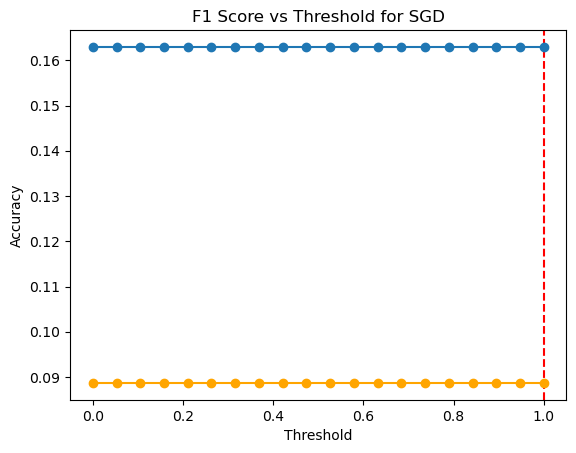

The best threshold is: 1.0


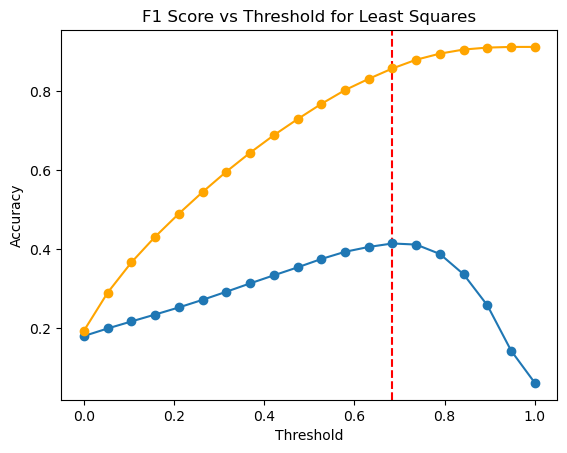

The best threshold is: 0.6842105263157894


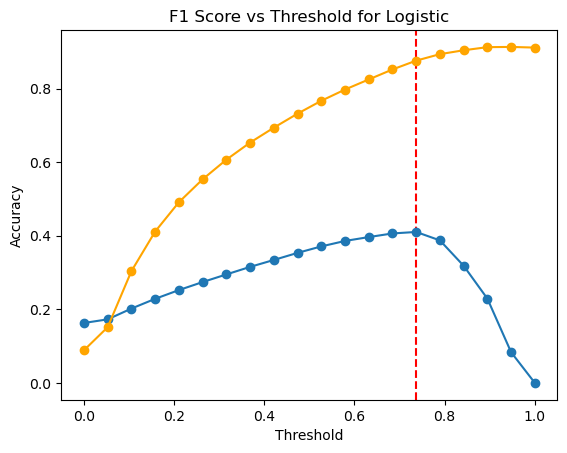

The best threshold is: 0.7368421052631579


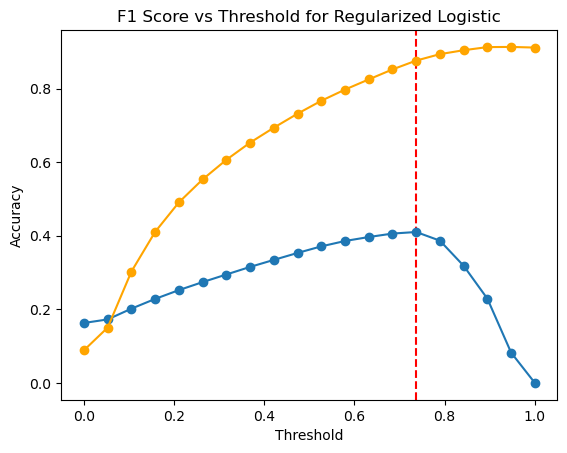

The best threshold is: 0.7368421052631579


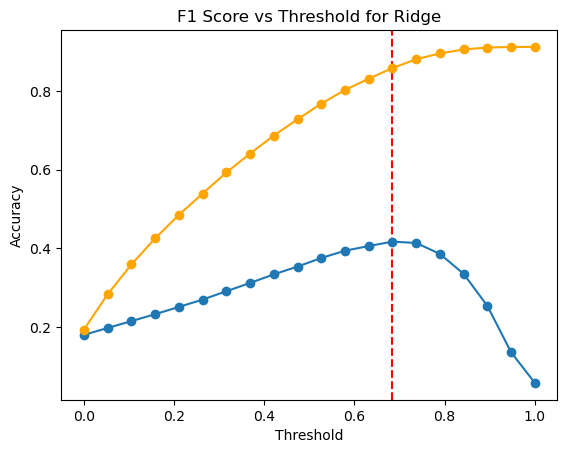

The best threshold is: 0.6842105263157894


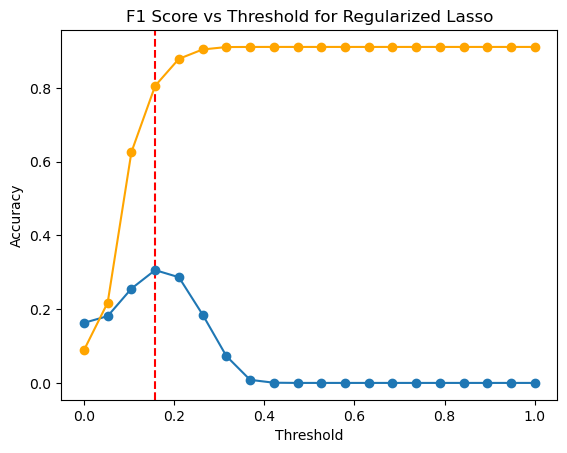

The best threshold is: 0.15789473684210525


In [14]:


def test_methods(x_test, y_test, w_sgd, w_least_squares, best_ridge_weights, best_log_weights, best_log_reg_weights, threshold=0.5):
    accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_test, w_sgd, "SGD", threshold)
    print(f"F1 score SGD is {implemented_functions.compute_f1_score(y_test, y_pred)}")
    accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_test, w_least_squares, "Least Squares", threshold)
    print(f"F1 score Least Squares is {implemented_functions.compute_f1_score(y_test, y_pred)}")
    accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_test, best_ridge_weights, "Ridge", threshold)
    print(f"F1 score Ridge is {implemented_functions.compute_f1_score(y_test, y_pred)}")
    accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_test, best_log_weights, "Logistic", threshold)
    print(f"F1 score Logistic is {implemented_functions.compute_f1_score(y_test, y_pred)}")
    accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_test, best_log_reg_weights, "Regularized Logistic", threshold)
    print(f"F1 score Regularized Logistic is {implemented_functions.compute_f1_score(y_test, y_pred)}")
    accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_test, best_log_lasso_weights, "Regularized Lasso", threshold)
    print(f"F1 score Regularized Lasso is {implemented_functions.compute_f1_score(y_test, y_pred)}")
    return y_pred

def test_thresholds(x_test, y_test, weights, method):
    f1_scores = []
    accuracies = []
    best_threshold = 0
    for threshold in np.linspace(0, 1, 20):
        accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_test, weights, method, threshold, detailed=False)
        f1_score = implemented_functions.compute_f1_score(y_test, y_pred)
        f1_scores.append(f1_score)
        if f1_score >= max(f1_scores):
            best_threshold = threshold
        accuracies.append(accuracy)
        #print(f"-----{method}: F1 score {method} at threshold {threshold} is {implemented_functions.compute_f1_score(y_test, y_pred)}")
    plt.axvline(x=best_threshold, color='r', linestyle='--')
    plt.plot(np.linspace(0, 1, 20), f1_scores, marker='o')
    plt.title(f'F1 Score vs Threshold for {method}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.plot(np.linspace(0, 1, 20), accuracies, marker='o', color='orange')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.show()
    print("The best threshold is:", best_threshold)
    return best_threshold
    

print("------Testing with threshold 0.5------")
test_methods(x_test_sample, y_test_sample, w_sgd, w_weighted_least_squares, best_ridge_weights, best_log_weights, best_log_reg_weights, threshold=0.5)
print("------Testing with threshold 0.3------")
test_methods(x_test_sample, y_test_sample, w_sgd, w_weighted_least_squares, best_ridge_weights, best_log_weights, best_log_reg_weights, threshold=0.3)
print("------Testing with threshold 0.7------")
test_methods(x_test_sample, y_test_sample, w_sgd, w_weighted_least_squares, best_ridge_weights, best_log_weights, best_log_reg_weights, threshold=0.6842105263157894)

sgd_best_threshold = test_thresholds(x_test_sample, y_test_sample, w_sgd, "SGD")
least_squares_best_threshold = test_thresholds(x_test_sample, y_test_sample, w_weighted_least_squares, "Least Squares")
logistic_best_threshold = test_thresholds(x_test_sample, y_test_sample, best_log_weights, "Logistic")
logistic_reg_best_threshold = test_thresholds(x_test_sample, y_test_sample, best_log_reg_weights, "Regularized Logistic")
ridge_best_threshold = test_thresholds(x_test_sample, y_test_sample, best_ridge_weights, "Ridge")
log_lasso_best_threshold = test_thresholds(x_test_sample, y_test_sample, best_log_lasso_weights, "Regularized Lasso")


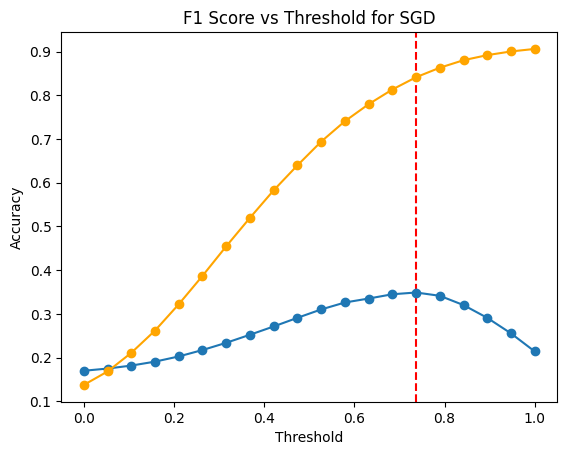

The best threshold is: 0.7368421052631579


In [68]:
sgd_best_threshold = test_thresholds(x_test_sample, y_test_sample, w_sgd, "SGD")

In [118]:
ids = [i for i in range(328135, 437513+1)]
import helpers
helpers.create_csv_submission(ids, y_pred, 'submission3.csv')

In [ ]:
best_ridge_weights.shape

(575,)

In [ ]:
x_train.shape

(8658, 575)

In [ ]:
x_test.shape

(50000, 561)